In [ ]:
import pandas as pd
import random
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, dot
from tensorflow.keras import regularizers
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
user_inventory=pd.read_csv("../data/User_Game_inventory.csv")

In [ ]:
user_inventory.head()

In [ ]:
user_inventory.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
user_inventory

In [ ]:
user_game_rating=user_inventory.fillna(0)

#임베딩을 위한 데이터프레임 형성

In [ ]:
user_num=[]
game_name=[]
time=[]

user_i=0
for i in range(user_game_rating.shape[0]):
    for j in range(user_game_rating.shape[1]):
        if user_game_rating.loc[i][j] != 0:
            user_num.append(user_i)
            game_name.append(user_game_rating.columns[j])
            time.append(user_game_rating.loc[i][j])
    user_i+=1

In [ ]:
len(user_num)

In [ ]:
len(game_name)

In [ ]:
len(time)

In [ ]:
rating_df=pd.DataFrame()

In [ ]:
# time의 점수화
scoring_time=[]
for play_time in time:
    if play_time<240:
        scoring_time.append(1)
    elif play_time<720:
        scoring_time.append(2)
    elif play_time<1080:
        scoring_time.append(3)
    elif play_time<1440:
        scoring_time.append(4)
    else:
        scoring_time.append(5)

In [ ]:
for i in range(1,6):
    print(scoring_time.count(i))

In [ ]:
rating_df["User"]=user_num
rating_df["Game Name"]=game_name
rating_df["time_rating"]=scoring_time

In [ ]:
rating_df

In [ ]:
rating_df.to_csv("User_inventory_rating.csv")

In [1]:
# 임베딩
import pandas as pd
import random
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, dot
from tensorflow.keras import regularizers
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
rating_df=pd.read_csv("../Data/User_inventory_rating.csv")

In [3]:
rating_df.head()

,Unnamed: 0,User,Game Name,time_rating
0,0,0,Counter-Strike: Global Offensive,5
1,1,0,Grand Theft Auto V,1
2,2,1,Total War: SHOGUN 2,1
3,3,1,Path of Exile,1
4,4,1,Life is Feudal: Your Own,5


In [4]:
del rating_df["Unnamed: 0"]

In [5]:
rating_df

,User,Game Name,time_rating
0,0,Counter-Strike: Global Offensive,5
1,0,Grand Theft Auto V,1
2,1,Total War: SHOGUN 2,1
3,1,Path of Exile,1
4,1,Life is Feudal: Your Own,5
...,...,...,...
6196,999,NEKOPARA Vol. 1,1
6197,999,"Warhammer 40,000: Dawn of War - Game of the Ye...",1
6198,999,House Flipper,2
6199,999,Depth,2


In [6]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, dot
from tensorflow.keras import regularizers
from tensorflow.keras.utils import get_file
import os

In [9]:
from tqdm import trange, notebook

rating_df.game=rating_df["Game Name"].astype('category').cat.codes.values
rating_df["Game Name"]=rating_df.game
rating_df.user=rating_df["User"].astype('category').cat.codes.values
rating_df["User"]=rating_df.user

item_input = Input(shape=[1]) 
user_input = Input(shape=[1])

n_items = len(rating_df["Game Name"].unique())
n_users = len(rating_df["User"].unique())

for latent_factors in notebook.tqdm(range(1,21)):
    item_embedding = Embedding(n_items, latent_factors, 
                        embeddings_regularizer=regularizers.l2(0.001),
                        name='item_embedding')(item_input)
    user_embedding = Embedding(n_users, latent_factors,
                        embeddings_regularizer=regularizers.l2(0.001),
                        name='user_embedding')(user_input)
    item_vec = Flatten()(item_embedding)
    user_vec = Flatten()(user_embedding)
    r_hat = dot([item_vec, user_vec], axes=-1)
    mini_model = Model([user_input, item_input], r_hat)
    mini_model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

    hist = mini_model.fit([rating_df.user, rating_df.game], rating_df["time_rating"], epochs=500, verbose=0) 
    print("<Latent_factor>: ",latent_factors,'\tloss: ', hist.history['loss'][-1],"\n")

C:\Users\msh20\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


<Latent_factor>:  1 	loss:  3.5756983757019043 

<Latent_factor>:  2 	loss:  3.425333261489868 

<Latent_factor>:  3 	loss:  3.3546605110168457 

<Latent_factor>:  4 	loss:  3.36200213432312 

<Latent_factor>:  5 	loss:  3.313241720199585 

<Latent_factor>:  6 	loss:  3.2939279079437256 

<Latent_factor>:  7 	loss:  3.2769594192504883 

<Latent_factor>:  8 	loss:  3.2577083110809326 

<Latent_factor>:  9 	loss:  3.2370424270629883 

<Latent_factor>:  10 	loss:  3.2404258251190186 

<Latent_factor>:  11 	loss:  3.2397043704986572 

<Latent_factor>:  12 	loss:  3.2243592739105225 

<Latent_factor>:  13 	loss:  3.228508710861206 

<Latent_factor>:  14 	loss:  3.2170538902282715 

<Latent_factor>:  15 	loss:  3.203923225402832 

<Latent_factor>:  16 	loss:  3.2018699645996094 

<Latent_factor>:  17 	loss:  3.198230743408203 

<Latent_factor>:  18 	loss:  3.2014718055725098 

<Latent_factor>:  19 	loss:  3.200486421585083 

<Latent_factor>:  20 	loss:  3.192312717437744 




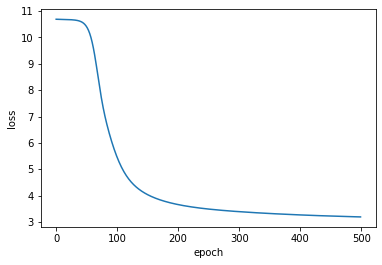

In [10]:
item_embedding = Embedding(n_items, 20, 
                        embeddings_regularizer=regularizers.l2(0.001),
                        name='item_embedding')(item_input)
user_embedding = Embedding(n_users, 20,
                        embeddings_regularizer=regularizers.l2(0.001),
                        name='user_embedding')(user_input)
item_vec = Flatten()(item_embedding)
user_vec = Flatten()(user_embedding)
r_hat = dot([item_vec, user_vec], axes=-1)
mini_model = Model([user_input, item_input], r_hat)
mini_model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

hist = mini_model.fit([rating_df.user, rating_df.game], rating_df["time_rating"], epochs=500, verbose=0)
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
Q = mini_model.get_layer(name='item_embedding').get_weights()[0]
P = mini_model.get_layer(name='user_embedding').get_weights()[0]
P_t = np.transpose(P)

R_hat = np.dot(Q,P_t)
R_hat=R_hat.T
embeding_rating=pd.DataFrame(R_hat)

In [12]:
embeding_rating

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,601
0,0.460547,0.257275,0.107505,0.640422,0.340797,0.449093,0.043132,0.037675,0.000306,0.041271,...,0.657018,0.088584,0.150951,0.535680,0.162711,0.215170,0.376517,0.469047,0.091355,0.104336
1,1.236492,0.947491,0.336702,3.873230,0.781555,0.982932,0.098145,0.077848,0.002558,0.108208,...,1.339629,0.245297,0.378320,1.130005,0.372688,0.620238,1.274697,0.970412,0.213148,0.291913
2,1.227606,0.965474,0.318682,2.669402,0.785304,0.982270,0.103198,0.075032,0.002837,0.103871,...,1.319382,0.247969,0.376239,1.189568,0.376436,0.591505,1.186636,1.059214,0.219903,0.314533
3,1.455182,1.203979,0.391646,3.712750,0.950963,1.167699,0.121911,0.091449,0.000858,0.123313,...,1.583967,0.329467,0.467327,1.444272,0.452076,0.726947,1.472814,1.274468,0.272554,0.356998
4,1.717825,1.450959,0.456649,4.560920,1.109963,1.404735,0.141102,0.102339,0.002037,0.161509,...,1.823520,0.421678,0.550421,1.730554,0.530950,0.840093,1.759359,1.514794,0.308858,0.442809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,2.263614,1.768043,0.588806,4.947623,1.453102,1.833896,0.192910,0.141313,0.005995,0.190919,...,2.491693,0.465254,0.691322,2.226287,0.709281,1.083319,2.172121,2.011630,0.398576,0.574046
876,1.341244,0.964691,0.352688,3.113425,0.889414,1.168661,0.121012,0.096300,0.003748,0.102919,...,1.713691,0.242286,0.409241,1.336208,0.468195,0.659787,1.287939,1.256682,0.239108,0.329187
877,0.555767,0.424035,0.144593,1.276558,0.353987,0.443545,0.045856,0.034443,0.002024,0.046790,...,0.602698,0.111212,0.168048,0.538364,0.169620,0.262876,0.522103,0.483953,0.095618,0.138410
878,1.133249,0.809220,0.299274,2.136419,0.712604,0.870776,0.096081,0.078251,0.006683,0.086909,...,1.251334,0.161450,0.326425,1.034990,0.331297,0.527274,1.001972,0.918591,0.184138,0.270792


In [ ]:
raw_data=pd.read_csv("./Data/User_inventory_rating.csv")

In [ ]:
Game_name=raw_data["Game Name"].unique()

In [ ]:
for i in range(602):
    embeding_rating.rename(columns={str(i):Game_name[i]}, inplace=True)

In [13]:
embeding_rating.to_csv("../Data/embeding_rating.csv")